### Part 1 - Import de todas as bibliotecas necessárias 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

### Part 2 - Leitura do local dataframe + informações básicas

In [ ]:
df = pd.read_csv('RTA Dataset.csv')
pd.set_option('display.max_columns', None)

df_1 = df.copy()
df_2 = df.copy()
df_3 = df.copy()
df_4 = df.copy()

In [ ]:
# descrever categorical columns
df.describe(include = 'object')

In [ ]:
df.isnull().sum()   #verificar quantas colunas têm valores nulos

### Part 3 - pre processing - divisão de experiências

 *  exp 1 - distribuir a proporção dos valores nulos (>4000) pelos restantes valores, mantendo a proporção
 *  exp 2 - eliminar colunas com valores nulos > 3500
 *  exp 3 - substituir valores nulos por valores em que a coluna da gravidade é a mesma (tendo em conta a sua moda)
 *  exp 4 - aplicar método do KNN às colunas com valores nulos

Antes de repartir em experiências, vamos analisar o que significam algumas colunas que aparentam não ser tão importantes para a nossa análise, eliminando-as de qualquer experiência

In [ ]:
type_of_vehicle = df['Type_of_vehicle'].value_counts()    #ELIMINAR COM CERTEZA -> irrelevante
print(type_of_vehicle, "\n\n")

owner_of_vehicle = df['Owner_of_vehicle'].value_counts()  #ELIMINAR COM CERTEZA -> irrelevante
print(owner_of_vehicle, "\n\n")

service_year_of_vehicle = df['Service_year_of_vehicle'].value_counts()    #ELIMINAR COM CERTEZA -> muitos nans
print(service_year_of_vehicle, "\n\n")

defect_of_vehicle = df['Defect_of_vehicle'].value_counts()  #tem 7777 "no defect"
print(defect_of_vehicle, "\n\n")    #ELIMINAR -> DADOS CONFUSOS

area_accident_occured = df['Area_accident_occured'].value_counts() #ELIMINAR -> IRRELEVANTE
print(area_accident_occured, "\n\n")

road_allignment = df['Road_allignment'].value_counts()  #ELIMINAR -> muitos dados iguais -> +80%  
print(road_allignment, "\n\n")

pedestrian_movement = df['Pedestrian_movement'].value_counts()  #ELIMINAR -> dados sem sentido
print(pedestrian_movement, "\n\n")

fitness_of_casuality = df['Fitness_of_casuality'].value_counts()  #ELIMINAR -> faltam dados e muitos iguais
print(fitness_of_casuality, "\n\n")

work_of_causalty = df['Work_of_casuality'].value_counts()
print(work_of_causalty, "\n\n")

casualty_class = df['Casualty_class'].value_counts()  #ELIMINAR -> ver matriz de correlação
print(casualty_class, "\n\n")

Após a análise, eliminamos as colunas que afetam pouco a nossa saída, que, como sabemos, é a última coluna: "Gravidade do Acidente"

In [ ]:
colunas_a_eliminar = ['Type_of_vehicle', 'Owner_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured',
                      'Road_allignment', 'Pedestrian_movement', 'Fitness_of_casuality', 'Work_of_casuality', 'Time', 'Day_of_week']

df.drop(colunas_a_eliminar, axis = 1, inplace = True)

Agora, para uma melhor compreensão da tabela, vamos renomear as colunas

In [ ]:
#time, day_of_week, age_band_of_driver, sex_of_driver, educational_level, vehicle_driver_relation, driving_experience
#type_of_vehicle, owner_of_vehicle, service_year_of_vehicle, defect_of_vehicle, area_accident_occured
#lanes_or_medians, road_allignment, types_of_junction, road_surface_type, road_surface_conditions, ligh_conditions
#weather_conditions, type_of_collision, number_of_vehicles_involved, number_of_casualties, vehicle_movement
#casualty_class, sex_of_casualty, age_band_of_casualty, casualty_severity, work_of_casualty, fitness_of_casualty
#pedestrian_movement, cause_of_accident, accident_severity,
colunas_renomeadas = ['Faixa Etária', 'Género', 'Nível de Educação', 'Relação com o Veículo', 
                      'Experiência de Condução', 'Idade do Veículo', 'Situação de Faixa', 'Tipo de Cruzamento',
                      'Tipo de Estrada', 'Condições do Piso', 'Condições de Visibilidade',
                      'Condições Meteorológicas', 'Tipo de Colisão', 'N.º Veículos Envolvidos',
                      'Número de Vítimas', 'Movimento do Veículo', 'Tipo de Vítima','Género da Vítima',
                      'Faixa Etária da Vítima', 'Gravidade da Vítima',
                      'Causa do Acidente', 'Gravidade do Acidente']

df.columns = colunas_renomeadas
df.head()

Vamos agora perceber quantos valores nulos existem e ainda realizar a substituição desses mesmos pela moda da coluna.

Neste passo, fomos apenar substituir os valores nulos cujas colunas tinham menos de 1000 valores "NaN", uma vez que afeta pouco a proporção dos valores, servindo de base a todas as experiências

In [ ]:
df.replace('na', pd.NA, inplace=True) # substituir "na" por um valor realmente nulo
df.isnull().sum()

df_sem_nulos = df.dropna(axis=1)

df_sem_nulos

In [ ]:
df['Nível de Educação'] = df['Nível de Educação'].fillna(df['Nível de Educação'].mode()[0])
df['Relação com o Veículo'] = df['Relação com o Veículo'].fillna(df['Relação com o Veículo'].mode()[0])
df['Experiência de Condução'] = df['Experiência de Condução'].fillna(df['Experiência de Condução'].mode()[0])
df['Situação de Faixa'] = df['Situação de Faixa'].fillna(df['Situação de Faixa'].mode()[0])
df['Tipo de Cruzamento'] = df['Tipo de Cruzamento'].fillna(df['Tipo de Cruzamento'].mode()[0])
df['Tipo de Estrada'] = df['Tipo de Estrada'].fillna(df['Tipo de Estrada'].mode()[0])
df['Tipo de Colisão'] = df['Tipo de Colisão'].fillna(df['Tipo de Colisão'].mode()[0])
df['Movimento do Veículo'] = df['Movimento do Veículo'].fillna(df['Movimento do Veículo'].mode()[0])

In [ ]:
df.isnull().sum()

In [ ]:
df_1.isnull().sum()

In [ ]:
df_1 = df.copy()
df_2 = df.copy()
df_3 = df.copy()
df_4 = df.copy()

#### Part 3.1 - distribuir a proporção dos valores nulos

In [ ]:
# definimos as colunas que queremos alterar
colunas_a_substituir = ['Idade do Veículo', 'Tipo de Vítima', 'Género da Vítima', 'Faixa Etária da Vítima', 'Gravidade da Vítima']

for coluna in colunas_a_substituir:

    no_valores_nulos = df_1[coluna].isnull().sum()

    # proporção de valores não nulos para cada categoria
    proporcoes_categoria = df_1[coluna].value_counts(normalize = True)

    # calcular o número de valores nulos a serem distribuídos para cada categoria
    distribuicao_nulos = (proporcoes_categoria * no_valores_nulos).round().astype(int)

    # neste caso, damos assign a cada valor nulo de forma RANDOM
    indices_nulo = df_1[df_1[coluna].isnull()].index
    for category, count in distribuicao_nulos.items():
        sample_indices = np.random.choice(indices_nulo, size = count, replace = False)
        df_1.loc[sample_indices, coluna] = category

    # preencher algum valor nulo que falte, RANDOM
    remaining_null_indices = df_1[df_1[coluna].isnull()].index
    remaining_categories = list(proporcoes_categoria.index)
    for index in remaining_null_indices:
        df_1.at[index, coluna] = np.random.choice(remaining_categories)

In [ ]:
df_1.isnull().sum()

In [ ]:
percentage_values = {}
for column in df_1.columns:
    counts = df_1[column].value_counts(normalize = True, dropna = False) * 100
    percentage_values[column] = counts

for column, percentages in percentage_values.items():
    print(percentages)
    print()

#### Part 3.2 - eliminar colunas com valores nulos > 3500

In [ ]:
colunas_valores_nulos = ['Idade do Veículo', 'Tipo de Vítima', 'Género da Vítima', 'Faixa Etária da Vítima', 'Gravidade da Vítima']

df_2.drop(colunas_valores_nulos, axis = 1, inplace = True)

In [ ]:
df_2.isnull().sum()

#### Part 3.3 - substituir valores nulos por valores em que a coluna da gravidade é a mesma (tendo em conta a sua moda)

In [ ]:
# definimos as colunas que queremos alterar
colunas_a_substituir = ['Idade do Veículo', 'Tipo de Vítima', 'Género da Vítima', 'Faixa Etária da Vítima', 'Gravidade da Vítima']

percentage_values = {}
for column in colunas_a_substituir:
    counts = df_3[column].value_counts(normalize = True, dropna = False) * 100
    percentage_values[column] = counts

for column, percentages in percentage_values.items():
    print(percentages)
    print()

In [ ]:
# Define the target column
target_column = 'Gravidade do Acidente'

# Iterate over each column with null values
for column in colunas_a_substituir:
    
    # Calculate the proportions of each value in the column for each category in the target column
    proportions = df_3.groupby(target_column)[column].value_counts(normalize=True)
    
    # For each null value in the column, replace it based on the proportions
    for index, row in df_3[df_3[column].isnull()].iterrows():
        
        # Get the proportions for the target value of this row
        target_value = row[target_column]
        target_proportions = proportions[target_value]
        
        # Sample from the proportions to replace the null value
        new_value = target_proportions.sample(weights=target_proportions).index[0]
        
        # Replace the null value
        df_3.at[index, column] = new_value

In [ ]:
df_3.isnull().sum()

In [ ]:
percentage_values = {}
for column in colunas_a_substituir:
    counts = df_3[column].value_counts(normalize = True, dropna = False) * 100
    percentage_values[column] = counts

for column, percentages in percentage_values.items():
    print(percentages)
    print()

#### Part 3.4 - aplicar método do KNN às colunas com valores nulos

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import numpy as np

# Initialize KNNImputer
imputer = KNNImputer()

# Get the columns with null values
colunas_a_substituir = df_4.columns[df_4.isnull().any()]

# Iterate over each column with null values
for column in colunas_a_substituir:
    # If the column is categorical, encode it using one-hot encoding or ordinal encoding
    if df_4[column].dtype == 'object':
        # Convert 'NAType' to NaN
        df_4[column] = df_4[column].replace('NAType', np.nan)
        # Handle missing values with a placeholder
        df_4[column] = df_4[column].fillna('missing')
        
        # Apply ordinal encoding
        encoder = OrdinalEncoder()
        encoded_values = encoder.fit_transform(df_4[[column]])
        encoded_df = pd.DataFrame(encoded_values, columns=[column], index=df_4.index)
        # Drop the original categorical column and concatenate the encoded columns
        df_4 = pd.concat([df_4.drop(column, axis=1), encoded_df], axis=1)
    else:
        # Extract the column data
        X = df_4.dropna(subset=[column], axis=0).drop(colunas_a_substituir, axis=1)
        y = df_4.dropna(subset=[column], axis=0)[column]
        X_with_null = df_4[df_4[column].isnull()].drop(colunas_a_substituir, axis=1)
        
        # Apply KNN imputation
        imputer.fit(X, y)
        imputed_values = imputer.transform(X_with_null)
        
        # Update the dataframe with imputed values
        df_4.loc[X_with_null.index, column] = imputed_values


In [ ]:
df_4.isnull().sum()

In [ ]:
percentage_values = {}
for column in df_4.columns:
    counts = df_4[column].value_counts(normalize = True, dropna = False) * 100
    percentage_values[column] = counts

for column, percentages in percentage_values.items():
    print(percentages)
    print()

### Part 4 - Fazer matriz de correlação e importância de variáveis

Após o pré-processamento, decidimos ficar com a terceira experiência, pois é a que apresenta melhores resultados, como podemos observar através da matriz de correlação entre as variáveis. 

In [ ]:
df = df_3.copy()

Gravidade_acidente_mapping = {'Slight Injury': 0, 'Serious Injury': 1, 'Fatal injury': 2, }
df['Gravidade do Acidente'] = df['Gravidade do Acidente'].map(Gravidade_acidente_mapping)

label_encoder = LabelEncoder()  # aplicar Label Encoder a todas as colunas "object"
for column in df.select_dtypes(include = 'object').columns:
    df[column] = label_encoder.fit_transform(df[column])

correlation_matrix = df.corr()
plt.figure(figsize = (20, 15))
sns.heatmap(correlation_matrix, annot = True, cmap = 'vlag', fmt = ".3f", linewidths = 1, square=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df

De seguida, analisamos a importância de cada feature para o modelo 

In [ ]:
X = df.iloc[:, :-1].values # todas as features
Y =  df.iloc[:, -1].values # feature target

modelo = ExtraTreesClassifier()
modelo.fit(X, Y)

feature_importances = pd.Series(modelo.feature_importances_, index = df.columns[:-1])
feature_importances.nlargest(10).plot(kind='barh')  # mostrar as 10 features mais importantes

plt.show()

Neste ponto, dividimos os dados em sets de treino e de teste, utilizando 30% dos dados para teste e os restantes para teino

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 30)

print("Número de exemplos nos dados de treino: ", X_train.shape[0])
print("Número de exemplos nos dados de teste: ", X_test.shape[0])

### Parte 5 - Árvores de Decisão

O primeiro modelo de machine learning utilizado foi o modelo de árvores de decisão.


Primeiro vamos estanderizar as nossas features. Isso é feito para garantir que todas as características tenham a mesma escala, o que pode melhorar o desempenho do algoritmo. 

In [ ]:
#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

#### Divisão por experiências:

 *  exp 1 - normal
 *  exp 2 - oversampling
 *  exp 3 - undersampling
 *  exp 4 - oversampling + undersampling
 *  exp 5 - SMOTE
 *  exp 6 - ADASYN

#### Part 5.1 - aplicar o método de forma normal

In [165]:
# O parâmetro max_depth = 4 define a profundidade máxima da árvore de decisão, 
# visto que limitar a profundidade pode ajudar a evitar overfitting, tornando a árvore mais simples.
# critério: usamos a entropia porque é a que maximiza a informação ganha
clf_1 = DecisionTreeClassifier(random_state = 42, criterion = "entropy", max_depth = 4)
clf_1 = clf_1.fit(X_train, y_train)

# Treino: Arvore de Decisão
y_pred_1 = clf_1.predict(X_test)
y_train_pred_1 = clf_1.predict(X_train)

Como podemos observar no classification report, o recall e o f1-score são nulos o que mostra que o modelo não está a ser utilizado de uma forma correta. 

Como podemos observar, existe desequilíbrio de classe no conjunto de dados, pois a classe '1' é significativamente menor do que as outras classes. Para tentar corrigir este erros, iremos usar técnicas de balanceamento de dados:

 * *oversampling* - aumentando o número de amostras da classe minoritária;
 * *undersampling* - reduzindo o número de amostras da classe majoritária, para lidar com o desequilíbrio de classe.

Quando o train data accuracy é muito maior que o test data accuracy, significa que o modelo está a overfitting, ou seja, está a aprender demasiado bem os dados de treino e não está a generalizar bem para os dados de teste.


#### Part 5.2 - aplicar o método de oversampling

In [166]:
oversample = RandomOverSampler(sampling_strategy = 'minority')
X_train_resampled, y_train_resampled = oversample.fit_resample(X_train, y_train)

clf_2 = DecisionTreeClassifier(random_state = 42, criterion = "entropy", max_depth = 4)
clf_2 = clf_2.fit(X_train_resampled, y_train_resampled)

y_pred_2= clf_2.predict(X_test)
y_train_pred_2 = clf_2.predict(X_train)

#### Part 5.3 - aplicar o método de undersampling

In [167]:
undersample = RandomUnderSampler(sampling_strategy = 'majority')
X_train_resampled, y_train_resampled = undersample.fit_resample(X_train, y_train)

clf_3 = DecisionTreeClassifier(random_state = 42, criterion = "entropy", max_depth = 4)
clf_3 = clf_3.fit(X_train_resampled, y_train_resampled)

y_pred_3= clf_3.predict(X_test)
y_train_pred_3= clf_3.predict(X_train)

#### Part 5.4 - aplicar o método de undersampling e oversampling

In [168]:
# Criando um pipeline com oversampling e undersampling
pipeline = Pipeline([
            ('over', RandomOverSampler(sampling_strategy = 'minority')),
            ('under', RandomUnderSampler(sampling_strategy = 'majority')),
        ])

# Aplicando o pipeline no conjunto de treino
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)
clf_4 = DecisionTreeClassifier(random_state = 42, criterion = "entropy", max_depth = 4)

clf_4.fit(X_train_resampled, y_train_resampled)

# Fazendo previsões
y_pred_4 = clf_4.predict(X_test)
y_train_pred_4 = clf_4.predict(X_train)


#### Part 5.5 - aplicar o método de SMOTE (Synthetic Minority Over-sampling Technique)

In [169]:
smote = SMOTE(sampling_strategy = 'auto', random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

clf_5 = DecisionTreeClassifier(random_state = 42, criterion = "entropy", max_depth = 4)

# Treinando o classificador
clf_5.fit(X_train_resampled, y_train_resampled)

# Fazendo previsões
y_pred_5 = clf_5.predict(X_test)
y_train_pred_5= clf_5.predict(X_train)


#### Part 5.6 - aplicar método de ADASYN (Adaptive Synthetic Sampling)

In [170]:
adasyn = ADASYN(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train, y_train)

clf_6 = DecisionTreeClassifier(random_state = 42, criterion = "entropy", max_depth = 4)

# Treinando o classificador
clf_6.fit(X_train_resampled, y_train_resampled)

# Fazendo previsões
y_pred_6 = clf_6.predict(X_test)
y_train_pred_6 = clf_6.predict(X_train)

Agora vamos observar os diferentes classification_report

In [172]:
# Print dos valores accuracy

from tabulate import tabulate
import re

y_pred_todos = []
y_pred_todos.extend([y_pred_1, y_pred_2, y_pred_3, y_pred_4, y_pred_5, y_pred_6])

y_train_pred_todos=[]
y_train_pred_todos.extend([y_train_pred_1, y_train_pred_2, y_train_pred_3, y_train_pred_4, y_train_pred_5, y_train_pred_6])

for indice, (y_pred, y_train_pred) in enumerate(zip(y_pred_todos, y_train_pred_todos)):
    print('\nClassification_report -', indice + 1 ,'Experiência\n')
    print('Train data accuracy: ', accuracy_score(y_true = y_train, y_pred = y_train_pred))
    print('Test data accuracy: ', accuracy_score(y_true = y_test, y_pred = y_pred))
    print('Decision tree accuracy: ', accuracy_score(y_pred, y_test))
    print('\n')
    print(classification_report(y_test, y_pred, zero_division = 1))


Classification_report - 1 Experiência

Train data accuracy:  0.8464215288249624
Test data accuracy:  0.8476319350473613
Decision tree accuracy:  0.8476319350473613


              precision    recall  f1-score   support

           0       0.85      0.99      0.92      3141
           1       0.30      0.01      0.03       501
           2       1.00      0.00      0.00        53

    accuracy                           0.85      3695
   macro avg       0.72      0.34      0.31      3695
weighted avg       0.78      0.85      0.78      3695


Classification_report - 2 Experiência

Train data accuracy:  0.7364574875304489
Test data accuracy:  0.7361299052774019
Decision tree accuracy:  0.7361299052774019


              precision    recall  f1-score   support

           0       0.86      0.85      0.86      3141
           1       0.58      0.03      0.05       501
           2       0.05      0.49      0.08        53

    accuracy                           0.74      3695
   macro avg 

Após estas várias experiências, decidimos que o método que apresenta melhores resultados é o ___, por isso agora vamos plotar a àrvore de decisão.

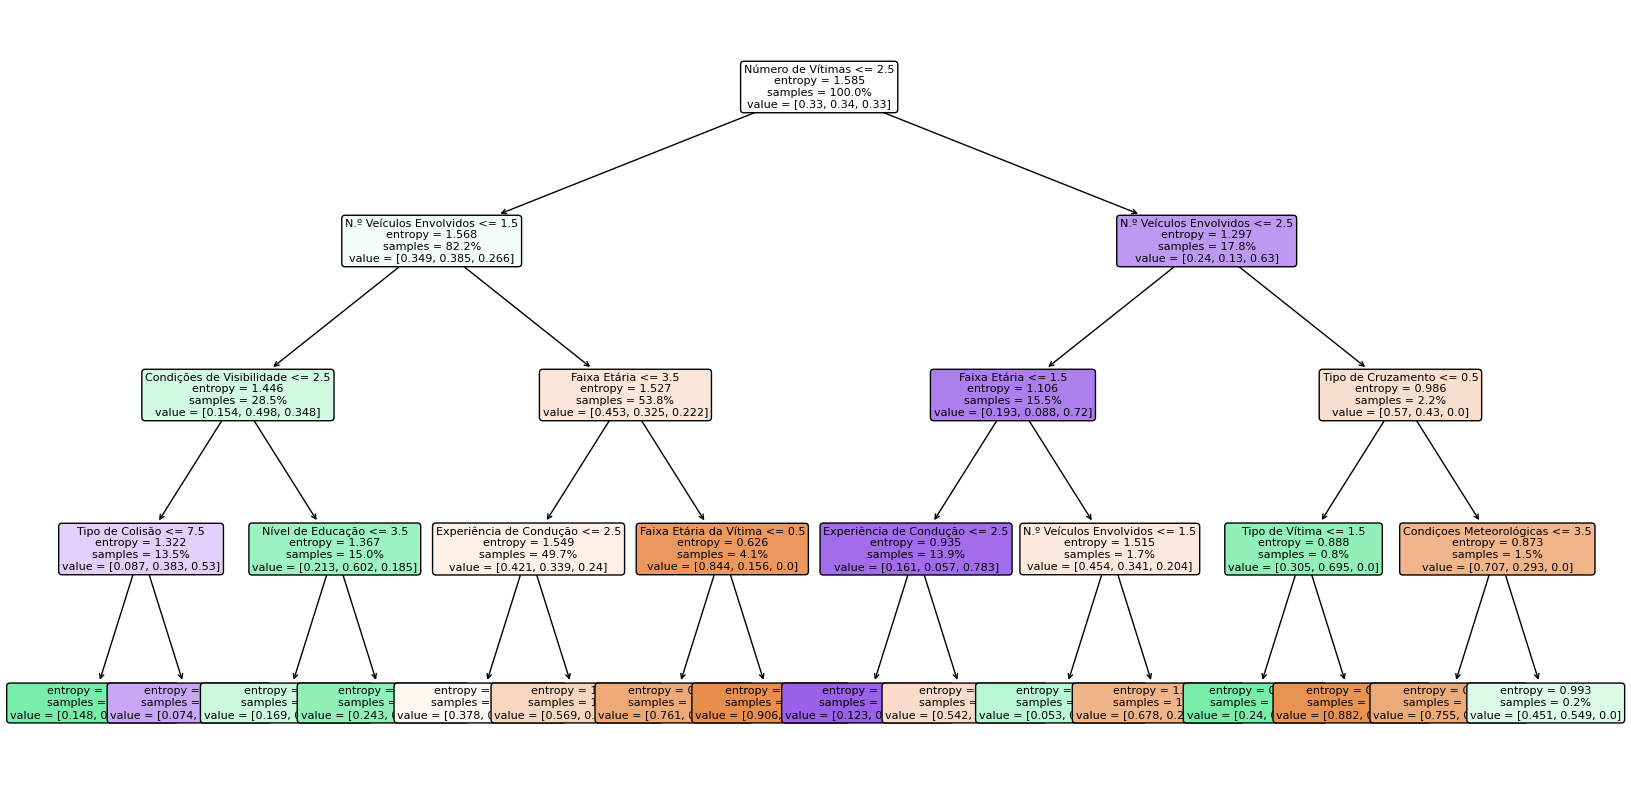

In [173]:
plt.figure(figsize = (20, 10))
tree.plot_tree(clf_6, fontsize = 8, feature_names = df.columns[:-1], filled = True, rounded = True, proportion=True)
plt.show()

Após realizar um classification report, vamos agora mostrar a matriz de confusão. Assim podemos ver a quantidade de falsos positivos e falsos negativos.

In [174]:
cf_matrix = confusion_matrix(y_test, y_train_pred_6)

ax = sns.heatmap(cf_matrix, annot = True, cmap = 'seismic', fmt = "4.0f")
ax.set_title('Seaborn Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted decision case disposition')
ax.set_ylabel('Actual decision case disposition ')

print(cf_matrix)

plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [3695, 8621]